1. Calculate a value for the integral
$$ I = \int_0 ^1 \frac{x^{-1/2}}{e^x + 1} dx $$
using the importance sampling method with $w(x) = x^{-1/2}$, with 1,000,000 random points.



<ipython-input-8-d7fe4706606d>:7: RuntimeWarning: divide by zero encountered in true_divide
  f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)
<ipython-input-8-d7fe4706606d>:8: RuntimeWarning: divide by zero encountered in true_divide
  w = lambda x: 1/np.sqrt(x)


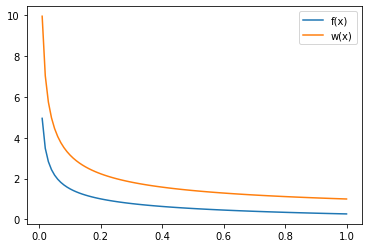

In [8]:
%matplotlib inline  
# Divergence problem
import matplotlib.pyplot as plt
import numpy as np
from math import pi

f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)
w = lambda x: 1/np.sqrt(x)
#p = lambda x: x*x

x = np.linspace(0,1,100)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, w(x), label='w(x)')
plt.legend()
plt.show()

Probability function:
$$ p(x) = \frac{w(x)}{\int_a^b w(x)dx} $$

 $$w(x) = x^{-1/2}$$

Integrate w(x): $ {\int_a^b w(x)dx} = 2 $

Solve: $$p(x) = .5*x^{-1/2}$$

The cumulative distribution function $F(x)$ is defined as:$$F(x)=\int_0^x p(x)dx=x^{1/2}$$

Cumulative distribution function is: $F^{-1}(x)= x^2$

$F^{-1}(x)$ generate $\frac{f(x_i)}{w(x_i)}$ points in:$$ I \approx  \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{w(x_i)} \int_a^b w(x)dx$$

In [9]:
from scipy.integrate import quad
print('from scipy: ', quad(f, 0, 1)[0])

from scipy:  0.8389329600133792


In [10]:
from random import random 
f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)
w = lambda x: 1/np.sqrt(x)
p = lambda x: x**2

def IMC(N):
    const = quad(w, 0, 1)[0]
    I = 0
    for i in range(N):
        x = random()
        y = p(x)
        I += f(y)/w(y)
    return I/N*const

print(IMC(1000))

0.8348872740964136


In [17]:
def MC(N):
    I = 0
    for i in range(N):
        x = random()
        I += f(x)
    return I/N
print(MC(100))


1.9960673821818684


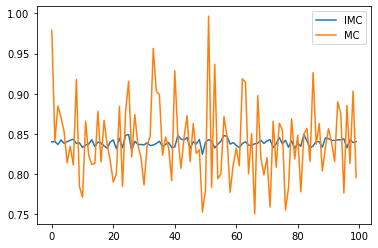

In [12]:
N = 1000
res_IMC = []
res_MC = []
for i in range(100):
    res_IMC.append(IMC(N))
    res_MC.append(MC(N))

plt.plot(res_IMC, label='IMC')
plt.plot(res_MC, label='MC')
plt.legend()

(array([92., 52., 33., 38., 24., 16., 24., 25., 12., 19., 11., 12., 13.,
        16., 14.,  9.,  9., 12., 12., 10.,  8., 16., 12., 13.,  9.,  9.,
        15., 11.,  9., 11., 11.,  7.,  9.,  9.,  5., 10.,  9.,  8.,  4.,
         7.,  8.,  5.,  7.,  7., 10., 11.,  6.,  8.,  6.,  9.,  9.,  7.,
         2., 11.,  7.,  6.,  8.,  5.,  9.,  6.,  6.,  1.,  6., 10., 10.,
         3.,  1.,  6.,  5.,  4.,  4.,  4.,  9.,  5.,  2.,  4.,  3.,  2.,
         7.,  5.,  7., 11.,  2.,  2.,  2.,  2.,  5.,  6.,  2.,  5.,  8.,
        10.,  7.,  5.,  5.,  9.,  6.,  5.,  6.,  6.]),
 array([7.71889605e-06, 1.00068699e-02, 2.00060210e-02, 3.00051720e-02,
        4.00043231e-02, 5.00034741e-02, 6.00026251e-02, 7.00017762e-02,
        8.00009272e-02, 9.00000783e-02, 9.99992293e-02, 1.09998380e-01,
        1.19997531e-01, 1.29996682e-01, 1.39995833e-01, 1.49994985e-01,
        1.59994136e-01, 1.69993287e-01, 1.79992438e-01, 1.89991589e-01,
        1.99990740e-01, 2.09989891e-01, 2.19989042e-01, 2.29988193e-01,
  

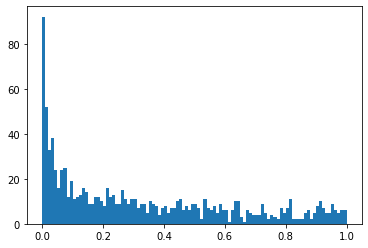

In [13]:
res = []
for i in range(1000):
    x = random()
    res.append(x*x)
plt.hist(res, bins=100)

2. Calculate a value for the integral
$$ I = \int_0 ^1 \frac{x^{-1}}{e^x + 1} dx $$
using the importance sampling method with $w(x) = 1/x$, with 1,000,000 random points.

<ipython-input-14-4f6e57bd1445>:7: RuntimeWarning: divide by zero encountered in true_divide
  f = lambda x: 1/x/(np.exp(x)+1)
<ipython-input-14-4f6e57bd1445>:8: RuntimeWarning: divide by zero encountered in true_divide
  w = lambda x: 1/x


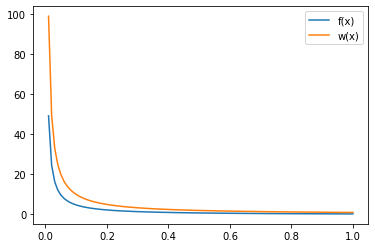

In [14]:
%matplotlib inline  
# Divergence problem
import matplotlib.pyplot as plt
import numpy as np
from math import pi

f = lambda x: 1/x/(np.exp(x)+1)
w = lambda x: 1/x
#p = lambda x: x*x

x = np.linspace(0,1,100)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, w(x), label='w(x)')
plt.legend()
plt.show()

Probability function:
$$ p(x) = \frac{w(x)}{\int_a^b w(x)dx} $$

 $$w(x) = 1/x $$

Integrate w(x): $ {\int_a^b w(x)dx} = ln(x) $

Solve: $$p(x) = \frac{1}{xln(x)}$$

The cumulative distribution function $F(x)$ is defined as:
$$F(x)=\int_0^x p(x)dx= ln(ln(x))$$
(technically undefined)

Cumulative distribution function is: $F^{-1}(x)= 1/ln(|ln(x)|)$

$F^{-1}(x)$ generate $\frac{f(x_i)}{w(x_i)}$ points in:$$ I \approx  \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{w(x_i)} \int_a^b w(x)dx$$

In [19]:
from scipy.integrate import quad
f_2 = lambda x: 1/x/(np.exp(x)+1)

print("From scipy ", quad(f_2, 6.6262e-34, 1)[0])

From scipy  20.594976039904015


<ipython-input-19-4871f5cce583>:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print("From scipy ", quad(f_2, 6.6262e-34, 1)[0])


In [25]:
from random import random 
from math import e, log
f2 = lambda x: 1/x/(np.exp(x)+1)
w2 = lambda x: 1/x
p2 =  e**(41.677*x+log(6.626e-34)) #Have to use log as ln is not in math


def IMC(N2):
    const = quad(w2, 0, 1)[0]
    I2 = 0
    for i in range(N2):
        x = random()
        y = p(x)
        I2 += f2(y)/w2(y)
    return I2/N2*const

print(IMC(1000))

17.440355289563747


<ipython-input-25-192f2f89608c>:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  const = quad(w2, 0, 1)[0]
